In [1]:
#install.packages("GLMsData")

package 'GLMsData' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Thanh\AppData\Local\Temp\RtmpYpFxHu\downloaded_packages


In [2]:
library(GLMsData)

In [3]:
data(lime); str(lime)

'data.frame':	385 obs. of  4 variables:
 $ Foliage: num  0.1 0.2 0.4 0.6 0.6 0.8 1 1.4 1.7 3.5 ...
 $ DBH    : num  4 6 8 9.6 11.3 13.7 15.4 17.8 18 22 ...
 $ Age    : int  38 38 46 44 60 56 72 74 68 79 ...
 $ Origin : Factor w/ 3 levels "Coppice","Natural",..: 2 2 2 2 2 2 2 2 2 2 ...


In [ ]:
head(lime)

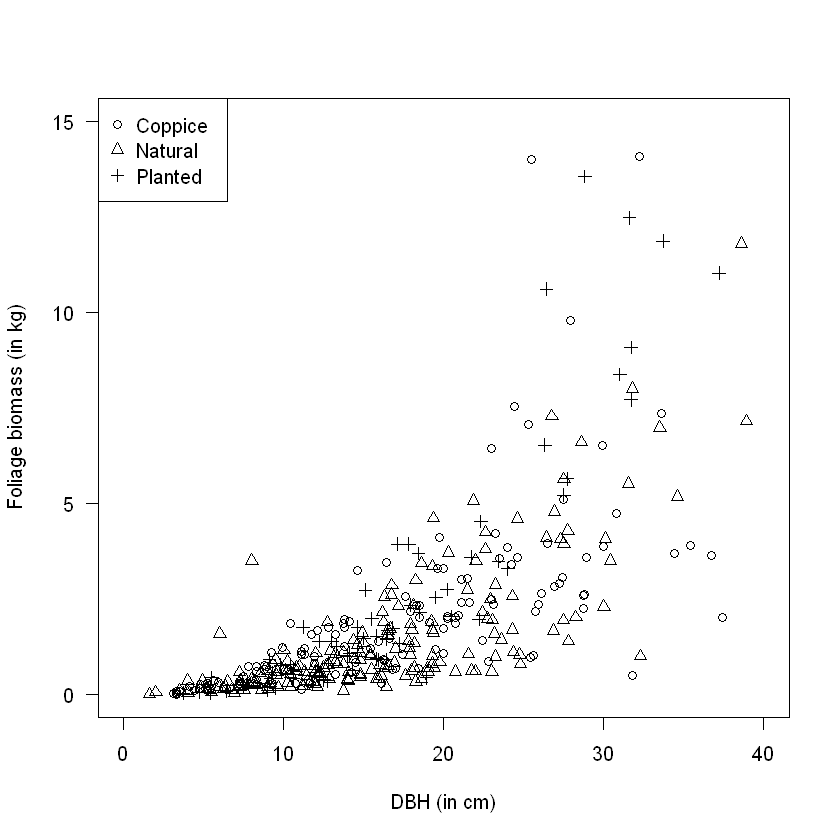

In [4]:
plot(Foliage ~ DBH, type="n", las=1,
xlab="DBH (in cm)", ylab="Foliage biomass (in kg)",
ylim = c(0, 15), xlim=c(0, 40), data=lime)
points(Foliage ~ DBH, data=subset(lime, Origin=="Coppice"), pch=1)
points(Foliage ~ DBH, data=subset(lime, Origin=="Natural"),
pch=2)
points(Foliage ~ DBH, data=subset(lime, Origin=="Planted"),
pch=3)
legend("topleft", pch=c(1, 2, 3),
legend=c("Coppice", "Natural","Planted"))

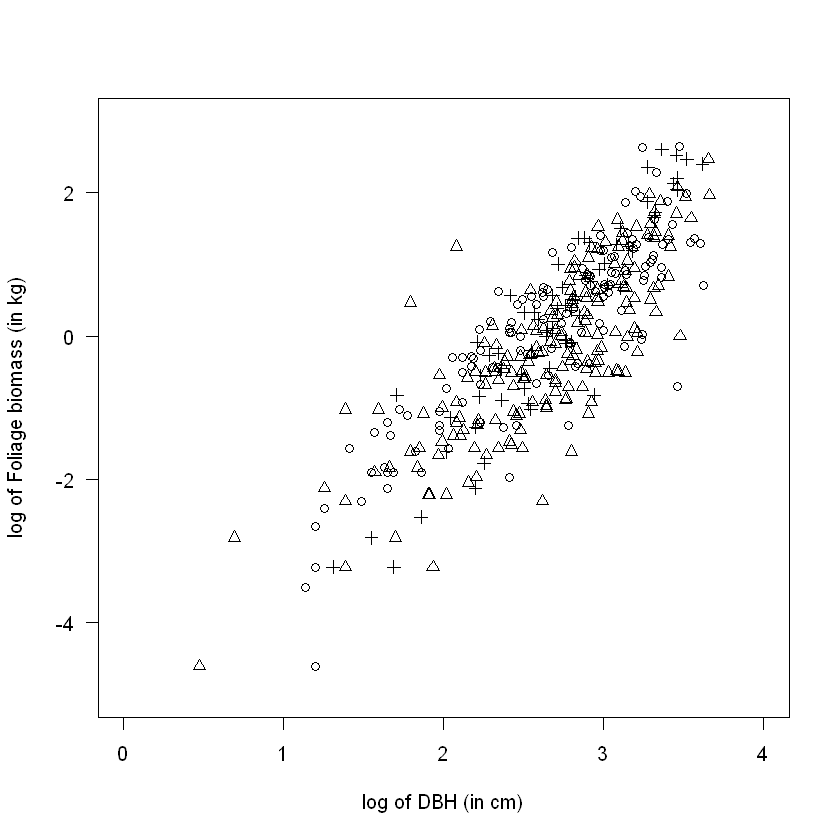

In [5]:
plot( log(Foliage) ~ log(DBH), type="n", las=1,
xlab="log of DBH (in cm)", ylab="log of Foliage biomass (in kg)",
ylim = c(-5, 3), xlim=c(0, 4), data=lime)
points(log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Coppice"),
pch=1)
points(log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Natural"),
pch=2)
points(log(Foliage) ~ log(DBH), data=subset(lime, Origin=="Planted"),
pch=3)

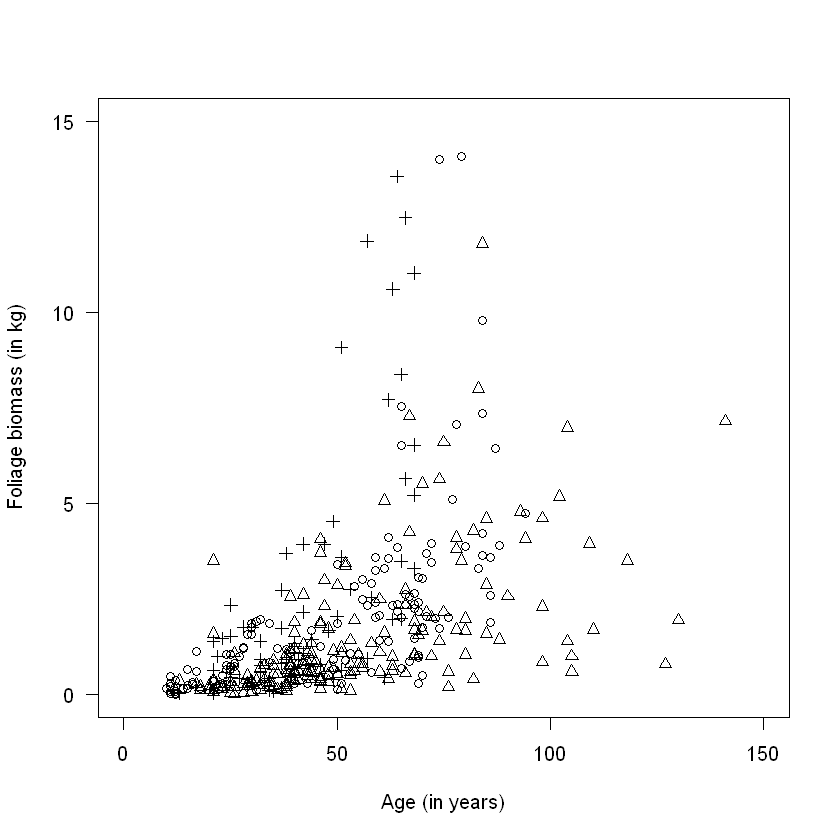

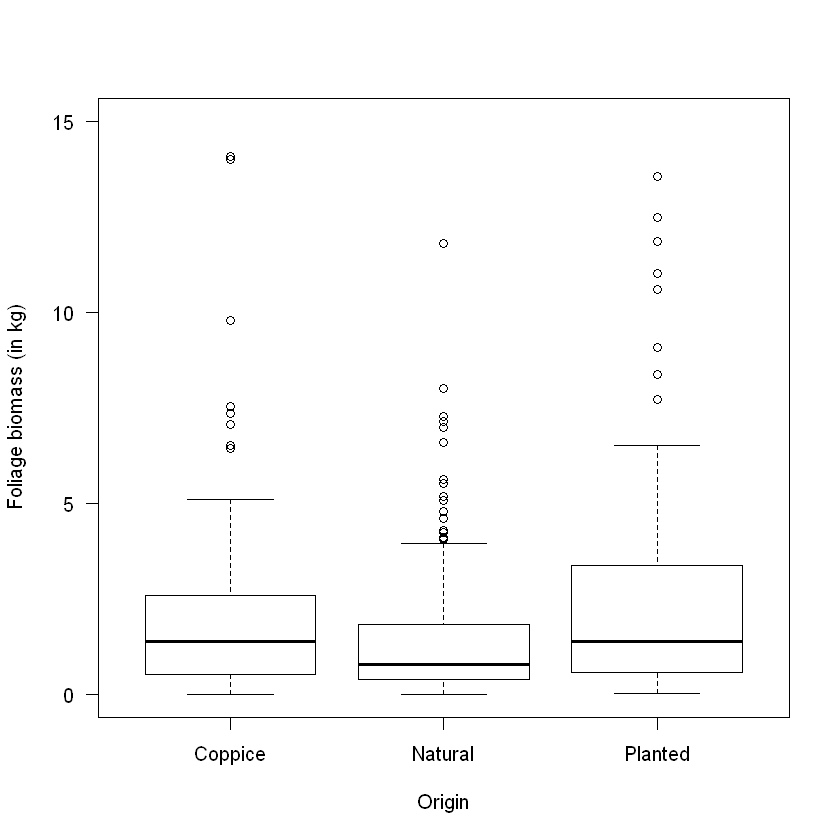

In [6]:
plot(Foliage ~ Age, type="n", las=1,
xlab="Age (in years)", ylab="Foliage biomass (in kg)",
ylim = c(0, 15), xlim=c(0, 150), data=lime)
points(Foliage ~ Age, data=subset(lime, Origin=="Coppice"), pch=1)
points(Foliage ~ Age, data=subset(lime, Origin=="Natural"), pch=2)
points(Foliage ~ Age, data=subset(lime, Origin=="Planted"), pch=3)
#
# Plot Foliage against Origin
plot( Foliage ~ Origin, data=lime, ylim=c(0, 15),
las=1, ylab="Foliage biomass (in kg)")

In [7]:
install.packages("BSDA")


  There is a binary version available but the source version is later:
     binary source needs_compilation
BSDA  1.2.0  1.2.1             FALSE



installing the source package 'BSDA'



In [8]:
library(BSDA)

Loading required package: lattice

Attaching package: 'BSDA'

The following object is masked from 'package:datasets':

    Orange



In [9]:
tsum.test(20, 21, 10, 15, 20, 30)


	Welch Modified Two-Sample t-Test

data:  Summarized x and y
t = 0.65976, df = 14.844, p-value = 0.5195
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.16796  21.16796
sample estimates:
mean of x mean of y 
       20        15 


In [10]:
lime.log <- glm( Foliage ~ Origin * log(DBH), family=Gamma(link="log"),
data=lime)

In [11]:
summary(lime.log)



Call:
glm(formula = Foliage ~ Origin * log(DBH), family = Gamma(link = "log"), 
    data = lime)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7480  -0.5354  -0.1509   0.2528   3.2938  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -4.6289     0.2756 -16.793  < 2e-16 ***
OriginNatural            0.3245     0.3882   0.836  0.40371    
OriginPlanted           -1.5285     0.5727  -2.669  0.00793 ** 
log(DBH)                 1.8432     0.1016  18.149  < 2e-16 ***
OriginNatural:log(DBH)  -0.2040     0.1433  -1.424  0.15536    
OriginPlanted:log(DBH)   0.5768     0.2093   2.755  0.00614 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.5443774)

    Null deviance: 508.48  on 384  degrees of freedom
Residual deviance: 152.69  on 379  degrees of freedom
AIC: 750.33

Number of Fisher Scoring iterations: 6


In [12]:
phi.md <- deviance(lime.log)/df.residual(lime.log)

In [13]:
phi.pearson <- summary( lime.log )$dispersion

In [14]:
c( "Mean Deviance"=phi.md, "Pearson"=phi.pearson)

Mean Deviance       Pearson 
    0.4028747     0.5443774

In [15]:
round(anova(lime.log, test="F"), 3)

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,384,508.481,NA,NA
Origin,2,19.894,382,488.586,18.272,0.000
log(DBH),1,328.007,381,160.580,602.535,0.000
Origin:log(DBH),2,7.890,379,152.689,7.247,0.001


In [16]:
round(anova(lime.log,test="F", dispersion=phi.md), 3)

Warning message in anova.glm(lime.log, test = "F", dispersion = phi.md):
"using F test with a fixed dispersion is inappropriate"

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,384,508.481,NA,NA
Origin,2,19.894,382,488.586,24.690,0
log(DBH),1,328.007,381,160.580,814.165,0
Origin:log(DBH),2,7.890,379,152.689,9.793,0


In [17]:
printCoefmat(coef(summary(lime.log)), 3)

                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -4.629      0.276  -16.79   <2e-16 ***
OriginNatural             0.325      0.388    0.84   0.4037    
OriginPlanted            -1.528      0.573   -2.67   0.0079 ** 
log(DBH)                  1.843      0.102   18.15   <2e-16 ***
OriginNatural:log(DBH)   -0.204      0.143   -1.42   0.1554    
OriginPlanted:log(DBH)    0.577      0.209    2.76   0.0061 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [18]:
lime.iG <- glm( Foliage ~ Origin * log(DBH),
family=inverse.gaussian(link="log"), data=lime)

In [19]:
phi.iG.mle <- deviance(lime.iG)/length(lime$Foliage)

In [20]:
phi.iG.md <- deviance(lime.iG)/df.residual(lime.iG)

In [21]:
phi.iG.pearson <- summary( lime.iG )$dispersion

In [22]:
c( "MLE"=phi.iG.mle, "Mean dev."=phi.iG.md, "Pearson"=phi.iG.pearson)

MLE Mean dev.   Pearson 
 1.056659  1.073387  1.255992